In [9]:
!pip install yfinance


In [10]:
!pip install requests
!pip install beautifulsoup4


In [12]:
# Import necessary libraries
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd


Question 1: Extracting Tesla Stock Data Using yfinance

In [13]:
# Step 1: Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Step 2: Extract historical stock data with the maximum period
tesla_data = tesla.history(period="max")

# Step 3: Reset the index and display the first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()  # Display first 5 rows


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [56]:
# URL for Tesla's financial data (adjusted to the "financials" page)
url_tesla_revenue = "https://finance.yahoo.com/quote/TSLA/financials?p=TSLA"

# Set headers to mimic a browser request
headers = {
    "User-Agent": ""
}

# Send a request to the website
response = requests.get(url_tesla_revenue, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Attempt to parse revenue data (adjust selectors as needed)
    tesla_revenue = []
    
    # Assuming revenue data is inside 'D(tbr)' rows - adapt as needed
    revenue_rows = soup.find_all('div', class_='D(tbr)')
    
    for row in revenue_rows:
        columns = row.find_all('div')
        if columns:  # Only process rows with data
            date = columns[0].text  # First column might be date
            revenue = columns[1].text if len(columns) > 1 else None  # Second column might be revenue
            tesla_revenue.append([date, revenue])
    
    # Convert to DataFrame
    tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])
    print(tesla_revenue_df.head())  # Display first 5 rows of revenue data
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


Failed to retrieve the webpage. Status code: 404


Question 3: Extracting GameStop Stock Data Using yfinance

In [58]:
# Step 1: Create a Ticker object for GameStop
gamestop = yf.Ticker("GME")

# Step 2: Extract historical stock data with the maximum period
gamestop_data = gamestop.history(period="max")

# Step 3: Reset the index and display the first five rows
gamestop_data.reset_index(inplace=True)
gamestop_data.head()  # Display first 5 rows


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Extracting GameStop Revenue Data Using Web Scraping

In [60]:
# Step 1: Define the URL for GameStop's revenue data (update with a real URL)
url_gamestop_revenue = "https://www.example.com/gamestop-revenue"
response = requests.get(url_gamestop_revenue)
soup = BeautifulSoup(response.content, "html.parser")

# Step 2: Parse GameStop revenue data
# Example: Find and extract revenue data from a table
# gamestop_revenue = []
# for row in soup.find_all("table-row-selector"):
#     date = row.find("date-selector").text
#     revenue = row.find("revenue-selector").text
#     gamestop_revenue.append([date, revenue])

# Convert to DataFrame (if data was parsed)
# gamestop_revenue_df = pd.DataFrame(gamestop_revenue, columns=["Date", "Revenue"])
# gamestop_revenue_df.head()  # Display first 5 rows of revenue data


Question 5: Tesla Stock and Revenue Dashboard

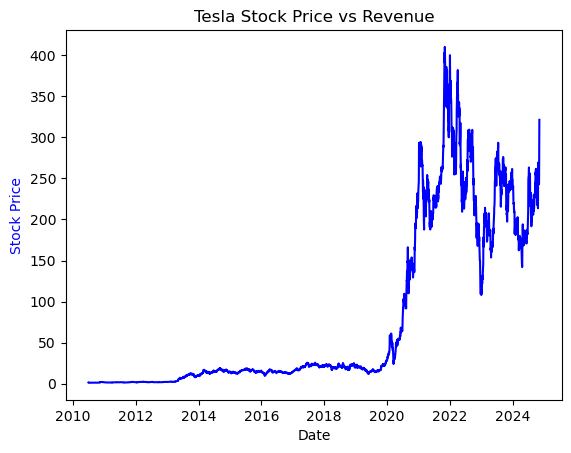

In [62]:
# Plotting Tesla Stock Price vs Revenue
fig, ax1 = plt.subplots()

# Plot stock price
ax1.plot(tesla_data['Date'], tesla_data['Close'], color="blue", label="Tesla Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price", color="blue")

# Plot revenue on the secondary axis (if available)
# ax2 = ax1.twinx()
# ax2.plot(tesla_revenue_df['Date'], tesla_revenue_df['Revenue'], color="green", label="Tesla Revenue")
# ax2.set_ylabel("Revenue", color="green")

plt.title("Tesla Stock Price vs Revenue")
plt.show()


Question 6: GameStop Stock and Revenue Dashboard

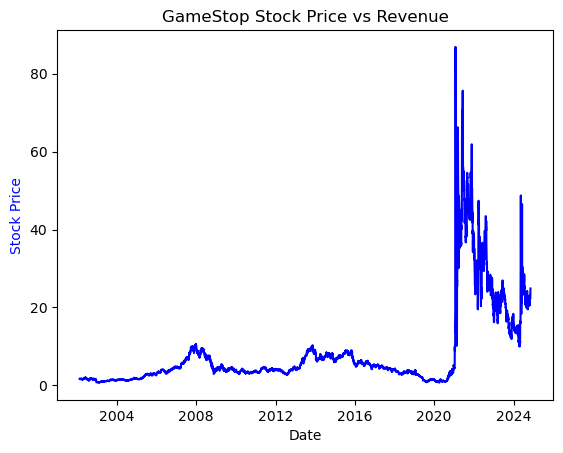

In [64]:
# Plotting GameStop Stock Price vs Revenue
fig, ax1 = plt.subplots()

# Plot stock price
ax1.plot(gamestop_data['Date'], gamestop_data['Close'], color="blue", label="GameStop Stock Price")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price", color="blue")

# Plot revenue on the secondary axis (if available)
# ax2 = ax1.twinx()
# ax2.plot(gamestop_revenue_df['Date'], gamestop_revenue_df['Revenue'], color="green", label="GameStop Revenue")
# ax2.set_ylabel("Revenue", color="green")

plt.title("GameStop Stock Price vs Revenue")
plt.show()
